<h1>Demosaicing<h1>

In [7]:
import cv2
print("OpenCV version: ",cv2.__version__)

import numpy as np
from skimage import measure
from matplotlib import pyplot as plt

OpenCV version:  3.3.0


In [8]:
#opencv colors blue,green,reed.
#matplotlib colors reed,green,blue.
def img_swap_colors(_img):
    _b, _g, _r = cv2.split(_img)
    return cv2.merge((_r, _g, _b))

In [9]:
def PSNR(_img1,_img2):
    b1,g1,r1 = cv2.split(_img1)
    b2,g2,r2 = cv2.split(_img2)    

    print("Red Channel: ",measure.compare_psnr(b1,b2),"dB")
    print("Green Channel: ",measure.compare_psnr(g1,g2),"dB")
    print("Blue Channel: ",measure.compare_psnr(r1,r2),"dB")
    print("Image: ",measure.compare_psnr(_img1,_img2),"dB")
    return

In [11]:
img = cv2.imread('C:\\Users\\Mauro\\Desktop\\mbmcpy - pynotebooks\\images\\ec.jpg')
print("Image:",type(img),img.shape[0], "x", img.shape[1])
print("Image Pixell:", type(img[0,0]), img[0,0].shape)
print("B, G, R :", type(img[0,0,0]), type(img[0,0,1]), type(img[0,0,2]))

plt.figure(figsize=(20,10))
plt.title("Original Image")
plt.imshow(img_swap_colors(img))
plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [9]:
def get_red_mask_matrix(_img_shape):
    _rows, _cols = _img_shape[0], _img_shape[1]
    _mask = np.zeros((_rows,_cols))
    _mask[::2,::2] = 1
    return np.array(_mask)

def get_green_mask_matrix(_img_shape):
    _rows, _cols = _img_shape[0], _img_shape[1]
    _mask = np.zeros((_rows,_cols))
    _mask[::2,1::2] = 1
    _mask[1::2,::2] = 1
    return np.array(_mask)
    
def get_blue_mask_matrix(_img_shape):
    _rows, _cols = _img_shape[0], _img_shape[1]
    _mask = np.zeros((_rows,_cols))
    _mask[1::2,1::2] = 1
    return np.array(_mask)

%time red_mask = get_red_mask_matrix(img.shape)
%time blue_mask = get_blue_mask_matrix(img.shape)
%time green_mask = get_green_mask_matrix(img.shape)

#print("RedMask:")
#print(red_mask[0:4,0:4])
#print("GreenMask:")
#print(green_mask[0:4,0:4])
#print("BlueMask:")
#print(blue_mask[0:4,0:4])

Wall time: 11 ms
Wall time: 13 ms
Wall time: 12 ms


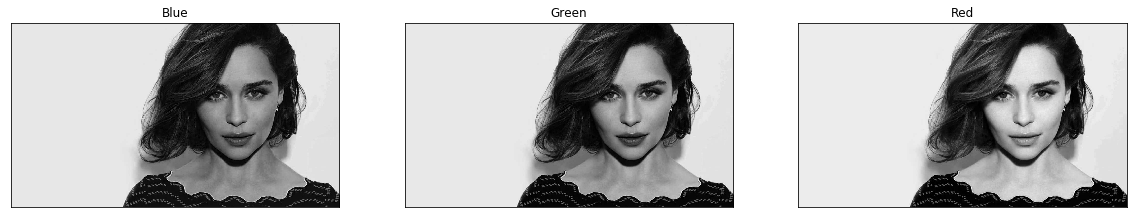

In [10]:
b,g,r = cv2.split(img)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Blue")
plt.imshow(b, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2)
plt.title("Green")
plt.imshow(g, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3)
plt.title("Red")
plt.imshow(r, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
%time CFA_red = red_mask*r
%time CFA_green = green_mask*g
%time CFA_blue = blue_mask*b

cv2.imwrite("CFA.jpg",cv2.merge((CFA_blue,CFA_green,CFA_red)))


Wall time: 8 ms
Wall time: 7.01 ms
Wall time: 6 ms


True

In [14]:
Blue = np.copy(CFA_blue)
Green = np.copy(CFA_green)
Red = np.copy(CFA_red)

for i in range(2,img.shape[0]-2):
    for j in range(2,img.shape[1]-2):
            
        #red position
        if not i%2 and not j%2:       
            Blue[i,j] = (Blue[i-1,j-1]+Blue[i-1,j+1]+Blue[i+1,j-1]+Blue[i+1,j+1])/4 
        
        #blue position
        if i%2 and j%2:
            Red[i,j] = (Red[i-1,j-1]+Red[i-1,j+1]+Red[i+1,j-1]+Red[i+1,j+1])/4 


In [15]:
for i in range(2,img.shape[0]-2):
    for j in range(2,img.shape[1]-2):
            
        #red position
        if not i%2 and not j%2:
            Green[i,j] = (Green[i-1,j]+Green[i+1,j]+Green[i,j-1]+Green[i,j+1])/4 
            
        #green position at blue red
        if not i%2 and j%2:
            Blue[i,j] = (Blue[i-1,j]+Blue[i+1,j]+Blue[i,j-1]+Blue[i,j+1])/4
            Red[i,j] = (Red[i-1,j]+Red[i+1,j]+Red[i,j-1]+Red[i,j+1])/4
            
        #green position at blue row
        if i%2 and not j%2:
            Blue[i,j] = (Blue[i-1,j]+Blue[i+1,j]+Blue[i,j-1]+Blue[i,j+1])/4
            Red[i,j] = (Red[i-1,j]+Red[i+1,j]+Red[i,j-1]+Red[i,j+1])/4
            
        #blue position
        if i%2 and j%2:
            Green[i,j] = (Green[i-1,j]+Green[i+1,j]+Green[i,j-1]+Green[i,j+1])/4 
            

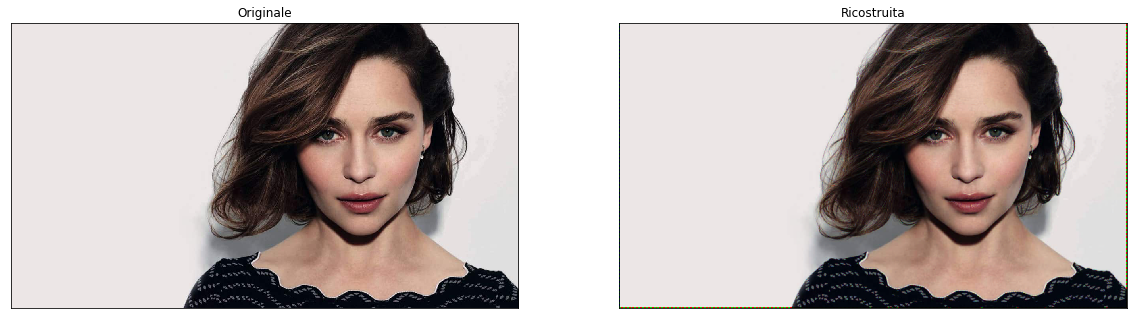

In [16]:
newimg = cv2.merge((Blue,Green,Red)).astype(np.uint8)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Originale")
plt.imshow(img_swap_colors(img))
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Ricostruita")
plt.imshow(img_swap_colors(newimg))
plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
PSNR(img[4:img.shape[0]-5,4:img.shape[1]-5,:],newimg[4:newimg.shape[0]-5,4:newimg.shape[1]-5,:] )

Red Channel:  35.76372236936172 dB
Green Channel:  40.60705719154555 dB
Blue Channel:  35.69797516855348 dB
Image:  36.837031346655884 dB


In [21]:
DBlue = np.zeros_like(b)
DGreen = np.zeros_like(g)
DRed = np.zeros_like(r)

alpha = 0.15 #0.5
beta= 0.12   #0.4
gamma= 0.17  #0.75

for i in range(2,img.shape[0]-2):
    for j in range(2,img.shape[1]-2):
        #red position
        if not i%2 and not j%2:
            DBlue[i,j] = (alpha)*(4*b[i,j]-b[i+2,j]-b[i-2,j]-b[i,j+2]-b[i,j-2])/4
            DGreen[i,j] = (alpha)*(4*g[i,j]-g[i+2,j]-g[i-2,j]-g[i,j+2]-g[i,j-2])/4
            
        #green position at blue red
        if not i%2 and j%2:
            DBlue[i,j] = (beta)*(4*b[i,j]-b[i+2,j]-b[i-2,j]-b[i,j+2]-b[i,j-2])/4
            DRed[i,j] = (beta)*(4*r[i,j]-r[i+2,j]-r[i-2,j]-r[i,j+2]-r[i,j-2])/4
            
        #green position at blue row
        if i%2 and not j%2:
            DBlue[i,j] = (beta)*(4*b[i,j]-b[i+2,j]-b[i-2,j]-b[i,j+2]-b[i,j-2])/4
            DRed[i,j] = (beta)*(4*r[i,j]-r[i+2,j]-r[i-2,j]-r[i,j+2]-r[i,j-2])/4
            
        #blue position
        if i%2 and j%2:
            DGreen[i,j] = (gamma)*(4*g[i,j]-g[i+2,j]-g[i-2,j]-g[i,j+2]-g[i,j-2])/4
            DRed[i,j] = (gamma)*(4*r[i,j]-r[i+2,j]-r[i-2,j]-r[i,j+2]-r[i,j-2])/4
            

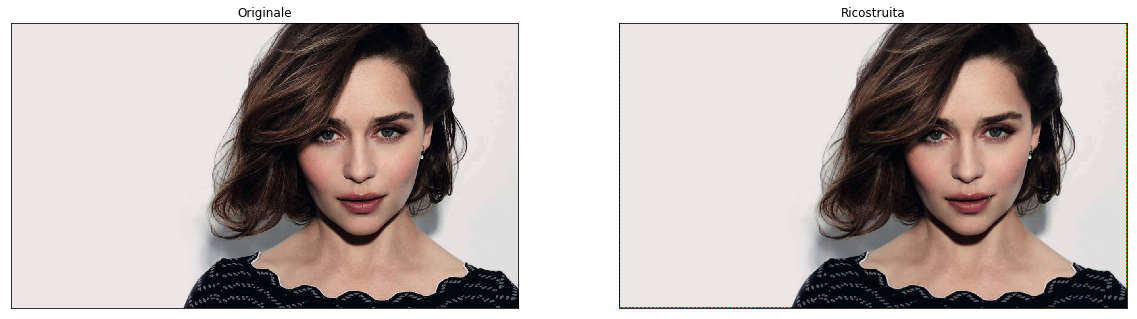

In [22]:
newnewimg = cv2.merge((Blue+DBlue, Green+DGreen, Red+DRed)).astype(np.uint8)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Originale")
plt.imshow(img_swap_colors(img))
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Ricostruita")
plt.imshow(img_swap_colors(newnewimg))
plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
PSNR(img[4:img.shape[0]-5,4:img.shape[1]-5,:],newnewimg[4:newnewimg.shape[0]-5,4:newnewimg.shape[1]-5,:] )

Red Channel:  37.11566297224783 dB
Green Channel:  42.0598100255858 dB
Blue Channel:  36.56378332365019 dB
Image:  37.98490476393465 dB
